# Bibliography data

## Import libraries and styles for data visualization

In [283]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import re
import ast

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (17,7)
plt.rcParams['font.size'] = 18

## High-level descriptive information

Load the dataset:

In [284]:
df = pd.read_csv('../data/bibliografia.csv', delimiter='|', encoding='ISO-8859-1')

In [285]:
df_ati = df[['IdBibliografia', 'Autore', 'Titolo', 'ISBN']]

### Data sparsity

Check NULL data:

<Axes: >

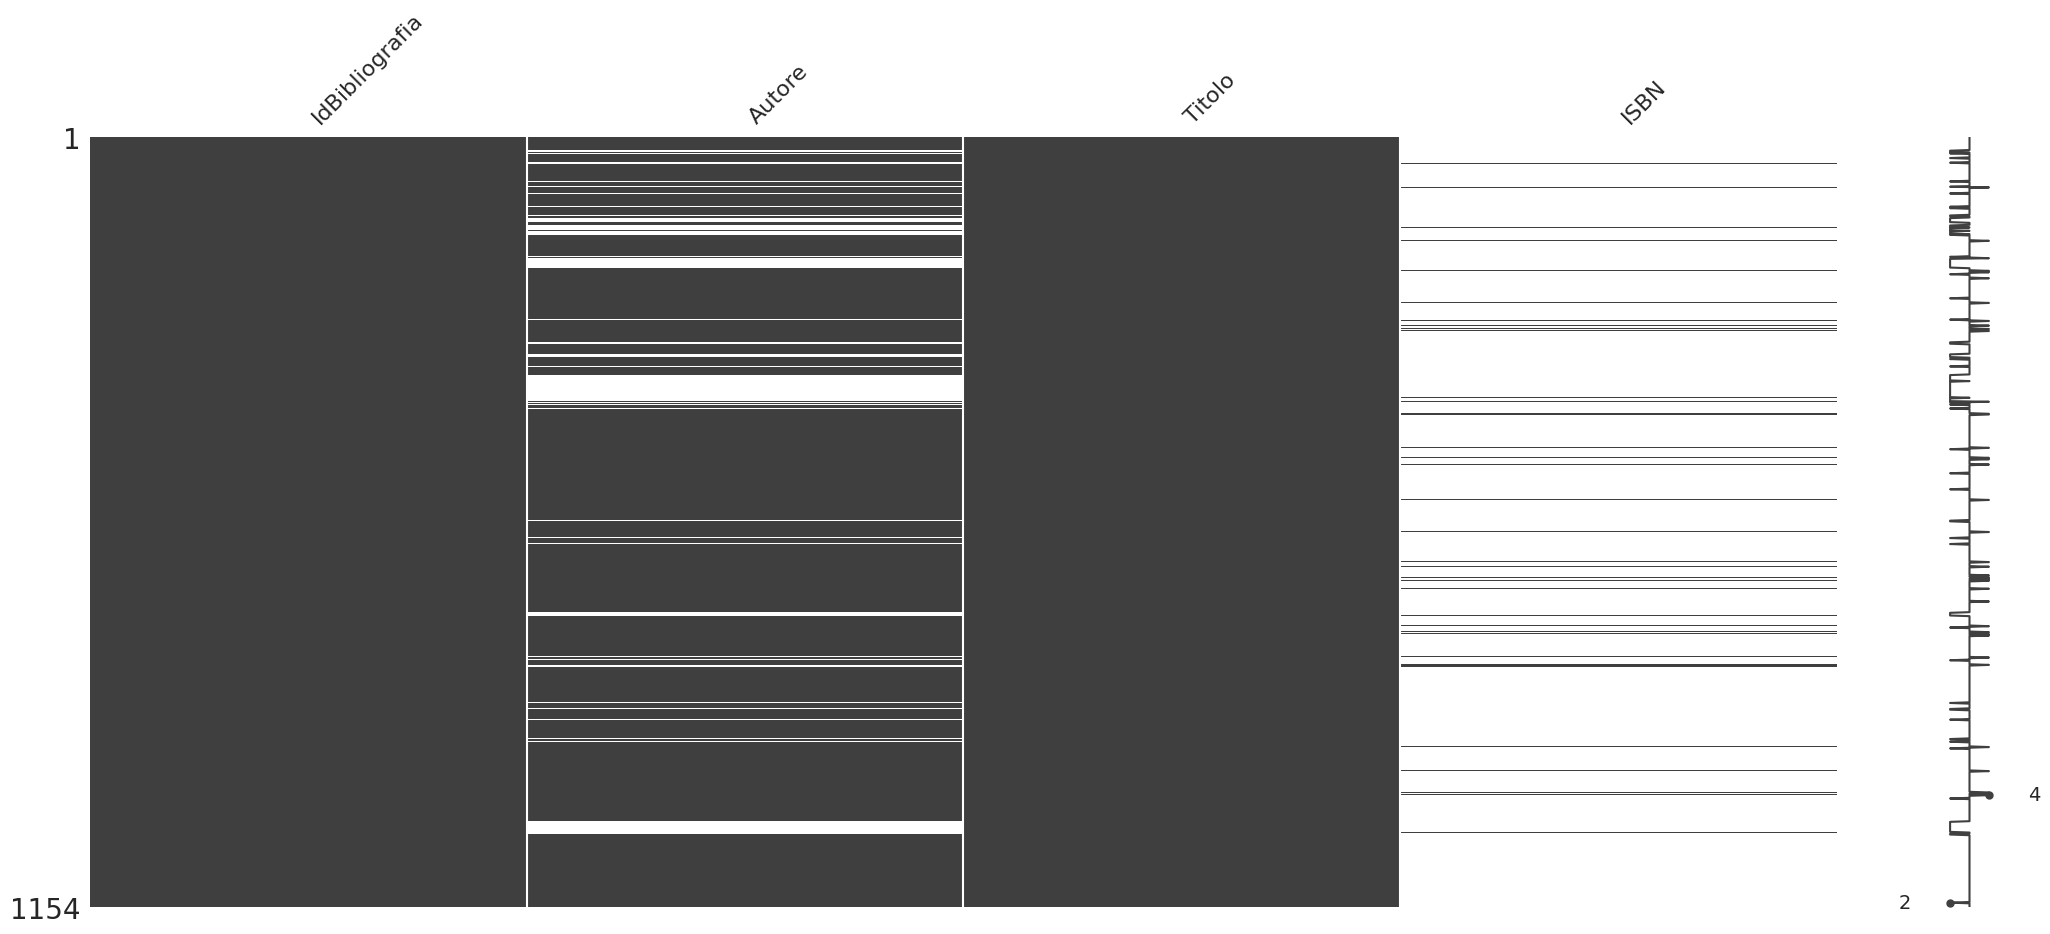

In [286]:
msno.matrix(df_ati)

In [287]:
print(df_ati["Autore"].str.endswith(".", na=False).sum())

970


In [288]:
print(df_ati["ISBN"].notna().sum())

53


## Data integration

In [289]:
def search_for_books(search_term, max_results = 1):
    if not search_term:
        return []
    if not isinstance(max_results, int):
        max_results = 3
    API_ENDPOINT = 'https://www.googleapis.com/books/v1/volumes'
    params = {
        'q': search_term,
        'maxResults': max_results
    }
    try:
        res = requests.get(API_ENDPOINT, params=params)
        return res.json()
    except requests.exceptions.RequestException as e:
        return e

In [290]:
def add_data(df, column_name, field):
    def get_book_data(title, field):
        title = title.lower()
        title = re.sub(r'[.:;,?!—\(\)\[\]\']\s|\s[.:;,?!—\(\)\[\]\']|[\s.:;,?!—\(\)\[\]\']', '+', title)
        try:
            api_data = search_for_books(title)
            if 'items' in api_data and api_data['items']:
                if field == 'authors':
                    return api_data['items'][0]['volumeInfo']['authors']
                elif field == 'identifiers':
                    return api_data['items'][0]['volumeInfo']['industryIdentifiers']
            else:
                return None
        except Exception as e:
            return None
    df[column_name] = df['Titolo'].apply(lambda title: get_book_data(title, field))
    return df

In [291]:
#df_ati = add_data(df_ati, 'new_authors', 'authors')
#df_ati

In [292]:
#df_ati = add_data(df_ati, 'new_identifier', 'identifiers')
#df_ati

In [293]:
#df_ati.to_csv('output.csv', index=False)

In [294]:
df_ati = pd.read_csv('output.csv')
df_ati

,IdBibliografia,Autore,Titolo,ISBN,new_authors,new_identifier
0,1,Ricci L.,Alcuni cenni storici di Cusercoli: omaggio al ...,NaN,['Giordano Viroli'],"[{'type': 'OTHER', 'identifier': 'UOM:39015040..."
1,2,Zampa R.,Il castello e la chiesa di Polenta nella provi...,NaN,['Raffaello Zampa'],"[{'type': 'OTHER', 'identifier': 'OCLC:1001173..."
2,3,Zambotti B.,Diario Ferrarese dell'anno 1476 sino al 1504: ...,NaN,['Bernardino Zambotti'],"[{'type': 'OTHER', 'identifier': 'OCLC:1743762..."
3,4,Zaghini F.,"Fiumana, l'abbazia, il paese e la parrocchia",NaN,['Franco Zaghini'],"[{'type': 'OTHER', 'identifier': 'OCLC:7962604..."
4,5,Zaccaria G.,Meldola un castello una città: notizie storich...,NaN,['Giacomo Zaccaria'],"[{'type': 'OTHER', 'identifier': 'OCLC:9632655..."
...,...,...,...,...,...,...
1149,1186,Baricchi W.,Le mura di Reggio Emilia - L'età contemporanea,NaN,['Stefano Levati'],"[{'type': 'ISBN_13', 'identifier': '9791254696..."
1150,1187,Gamberini A.,Reggio e le sue mura in età comunale e princip...,NaN,"['Gino Badini', 'Walter Baricchi', 'Attilio Ma...","[{'type': 'OTHER', 'identifier': 'OCLC:3157867..."
1151,1188,Gelichi S. - Curina R.,Le mura inesistenti? Il perimetro urbano della...,NaN,['Arturo Calzona'],"[{'type': 'OTHER', 'identifier': 'STANFORD:361..."
1152,1189,Bianchini M.,Urbs e civitas. Per la storia di un'identità:...,NaN,['Ilaria Boniburini'],"[{'type': 'ISBN_10', 'identifier': '8860554160..."


In [295]:
def convert_to_list(value):
    if pd.isna(value):
        return []
    if isinstance(value, str):
        try:
            return ast.literal_eval(value)
        except (ValueError, SyntaxError):
            return []
    return value

df_ati["new_authors"] = df_ati["new_authors"].apply(convert_to_list)
df_ati["new_identifier"] = df_ati["new_identifier"].apply(convert_to_list)

df_ati

,IdBibliografia,Autore,Titolo,ISBN,new_authors,new_identifier
0,1,Ricci L.,Alcuni cenni storici di Cusercoli: omaggio al ...,NaN,[Giordano Viroli],"[{'type': 'OTHER', 'identifier': 'UOM:39015040..."
1,2,Zampa R.,Il castello e la chiesa di Polenta nella provi...,NaN,[Raffaello Zampa],"[{'type': 'OTHER', 'identifier': 'OCLC:1001173..."
2,3,Zambotti B.,Diario Ferrarese dell'anno 1476 sino al 1504: ...,NaN,[Bernardino Zambotti],"[{'type': 'OTHER', 'identifier': 'OCLC:1743762..."
3,4,Zaghini F.,"Fiumana, l'abbazia, il paese e la parrocchia",NaN,[Franco Zaghini],"[{'type': 'OTHER', 'identifier': 'OCLC:7962604..."
4,5,Zaccaria G.,Meldola un castello una città: notizie storich...,NaN,[Giacomo Zaccaria],"[{'type': 'OTHER', 'identifier': 'OCLC:9632655..."
...,...,...,...,...,...,...
1149,1186,Baricchi W.,Le mura di Reggio Emilia - L'età contemporanea,NaN,[Stefano Levati],"[{'type': 'ISBN_13', 'identifier': '9791254696..."
1150,1187,Gamberini A.,Reggio e le sue mura in età comunale e princip...,NaN,"[Gino Badini, Walter Baricchi, Attilio Marches...","[{'type': 'OTHER', 'identifier': 'OCLC:3157867..."
1151,1188,Gelichi S. - Curina R.,Le mura inesistenti? Il perimetro urbano della...,NaN,[Arturo Calzona],"[{'type': 'OTHER', 'identifier': 'STANFORD:361..."
1152,1189,Bianchini M.,Urbs e civitas. Per la storia di un'identità:...,NaN,[Ilaria Boniburini],"[{'type': 'ISBN_10', 'identifier': '8860554160..."


In [296]:
print(df_ati["new_authors"].apply(type).unique())

[<class 'list'>]


In [297]:
def reconcile_authors(row):
    try:
        family_name = row["Autore"].split()[0]
        for author in row["new_authors"]:
            if family_name in author:
                row["author"] = "; ".join(row["new_authors"])
        return row
    except Exception as e:
        pass

df_ati = df_ati.apply(reconcile_authors, axis=1)
df_ati

,Autore,ISBN,IdBibliografia,Titolo,author,new_authors,new_identifier
0,Ricci L.,NaN,1.0,Alcuni cenni storici di Cusercoli: omaggio al ...,NaN,[Giordano Viroli],"[{'type': 'OTHER', 'identifier': 'UOM:39015040..."
1,Zampa R.,NaN,2.0,Il castello e la chiesa di Polenta nella provi...,Raffaello Zampa,[Raffaello Zampa],"[{'type': 'OTHER', 'identifier': 'OCLC:1001173..."
2,Zambotti B.,NaN,3.0,Diario Ferrarese dell'anno 1476 sino al 1504: ...,Bernardino Zambotti,[Bernardino Zambotti],"[{'type': 'OTHER', 'identifier': 'OCLC:1743762..."
3,Zaghini F.,NaN,4.0,"Fiumana, l'abbazia, il paese e la parrocchia",Franco Zaghini,[Franco Zaghini],"[{'type': 'OTHER', 'identifier': 'OCLC:7962604..."
4,Zaccaria G.,NaN,5.0,Meldola un castello una città: notizie storich...,Giacomo Zaccaria,[Giacomo Zaccaria],"[{'type': 'OTHER', 'identifier': 'OCLC:9632655..."
...,...,...,...,...,...,...,...
1149,Baricchi W.,NaN,1186.0,Le mura di Reggio Emilia - L'età contemporanea,NaN,[Stefano Levati],"[{'type': 'ISBN_13', 'identifier': '9791254696..."
1150,Gamberini A.,NaN,1187.0,Reggio e le sue mura in età comunale e princip...,NaN,"[Gino Badini, Walter Baricchi, Attilio Marches...","[{'type': 'OTHER', 'identifier': 'OCLC:3157867..."
1151,Gelichi S. - Curina R.,NaN,1188.0,Le mura inesistenti? Il perimetro urbano della...,NaN,[Arturo Calzona],"[{'type': 'OTHER', 'identifier': 'STANFORD:361..."
1152,Bianchini M.,NaN,1189.0,Urbs e civitas. Per la storia di un'identità:...,NaN,[Ilaria Boniburini],"[{'type': 'ISBN_10', 'identifier': '8860554160..."


In [298]:
def reconcile_identifiers(row):
    try:
        if row["author"]:
            identifiers = []
            for identifier_entry in row["new_identifier"]:
                identifier_value = identifier_entry["identifier"]
                if not identifier_value[0].isalpha():
                    identifier_value = f"ISBN:{identifier_value}"
                identifiers.append(identifier_value)
            row["identifier"] = "; ".join(identifiers)
        return row
    except Exception as e:
        pass

df_ati = df_ati.apply(reconcile_identifiers, axis=1)
df_ati

,Autore,ISBN,IdBibliografia,Titolo,author,identifier,new_authors,new_identifier
0,Ricci L.,NaN,1.0,Alcuni cenni storici di Cusercoli: omaggio al ...,NaN,UOM:39015040706734,[Giordano Viroli],"[{'type': 'OTHER', 'identifier': 'UOM:39015040..."
1,Zampa R.,NaN,2.0,Il castello e la chiesa di Polenta nella provi...,Raffaello Zampa,OCLC:1001173233,[Raffaello Zampa],"[{'type': 'OTHER', 'identifier': 'OCLC:1001173..."
2,Zambotti B.,NaN,3.0,Diario Ferrarese dell'anno 1476 sino al 1504: ...,Bernardino Zambotti,OCLC:174376226,[Bernardino Zambotti],"[{'type': 'OTHER', 'identifier': 'OCLC:1743762..."
3,Zaghini F.,NaN,4.0,"Fiumana, l'abbazia, il paese e la parrocchia",Franco Zaghini,OCLC:79626048,[Franco Zaghini],"[{'type': 'OTHER', 'identifier': 'OCLC:7962604..."
4,Zaccaria G.,NaN,5.0,Meldola un castello una città: notizie storich...,Giacomo Zaccaria,OCLC:963265524,[Giacomo Zaccaria],"[{'type': 'OTHER', 'identifier': 'OCLC:9632655..."
...,...,...,...,...,...,...,...,...
1149,Baricchi W.,NaN,1186.0,Le mura di Reggio Emilia - L'età contemporanea,NaN,ISBN:9791254696118,[Stefano Levati],"[{'type': 'ISBN_13', 'identifier': '9791254696..."
1150,Gamberini A.,NaN,1187.0,Reggio e le sue mura in età comunale e princip...,NaN,OCLC:315786721,"[Gino Badini, Walter Baricchi, Attilio Marches...","[{'type': 'OTHER', 'identifier': 'OCLC:3157867..."
1151,Gelichi S. - Curina R.,NaN,1188.0,Le mura inesistenti? Il perimetro urbano della...,NaN,STANFORD:36105121493162,[Arturo Calzona],"[{'type': 'OTHER', 'identifier': 'STANFORD:361..."
1152,Bianchini M.,NaN,1189.0,Urbs e civitas. Per la storia di un'identità:...,NaN,ISBN:8860554160; ISBN:9788860554161,[Ilaria Boniburini],"[{'type': 'ISBN_10', 'identifier': '8860554160..."


In [299]:
df_ati['author'] = df_ati['author'].fillna(df_ati['Autore'])
df_ati

,Autore,ISBN,IdBibliografia,Titolo,author,identifier,new_authors,new_identifier
0,Ricci L.,NaN,1.0,Alcuni cenni storici di Cusercoli: omaggio al ...,Ricci L.,UOM:39015040706734,[Giordano Viroli],"[{'type': 'OTHER', 'identifier': 'UOM:39015040..."
1,Zampa R.,NaN,2.0,Il castello e la chiesa di Polenta nella provi...,Raffaello Zampa,OCLC:1001173233,[Raffaello Zampa],"[{'type': 'OTHER', 'identifier': 'OCLC:1001173..."
2,Zambotti B.,NaN,3.0,Diario Ferrarese dell'anno 1476 sino al 1504: ...,Bernardino Zambotti,OCLC:174376226,[Bernardino Zambotti],"[{'type': 'OTHER', 'identifier': 'OCLC:1743762..."
3,Zaghini F.,NaN,4.0,"Fiumana, l'abbazia, il paese e la parrocchia",Franco Zaghini,OCLC:79626048,[Franco Zaghini],"[{'type': 'OTHER', 'identifier': 'OCLC:7962604..."
4,Zaccaria G.,NaN,5.0,Meldola un castello una città: notizie storich...,Giacomo Zaccaria,OCLC:963265524,[Giacomo Zaccaria],"[{'type': 'OTHER', 'identifier': 'OCLC:9632655..."
...,...,...,...,...,...,...,...,...
1149,Baricchi W.,NaN,1186.0,Le mura di Reggio Emilia - L'età contemporanea,Baricchi W.,ISBN:9791254696118,[Stefano Levati],"[{'type': 'ISBN_13', 'identifier': '9791254696..."
1150,Gamberini A.,NaN,1187.0,Reggio e le sue mura in età comunale e princip...,Gamberini A.,OCLC:315786721,"[Gino Badini, Walter Baricchi, Attilio Marches...","[{'type': 'OTHER', 'identifier': 'OCLC:3157867..."
1151,Gelichi S. - Curina R.,NaN,1188.0,Le mura inesistenti? Il perimetro urbano della...,Gelichi S. - Curina R.,STANFORD:36105121493162,[Arturo Calzona],"[{'type': 'OTHER', 'identifier': 'STANFORD:361..."
1152,Bianchini M.,NaN,1189.0,Urbs e civitas. Per la storia di un'identità:...,Bianchini M.,ISBN:8860554160; ISBN:9788860554161,[Ilaria Boniburini],"[{'type': 'ISBN_10', 'identifier': '8860554160..."


In [300]:
df_ati = df_ati.drop(["Autore", "ISBN", "new_authors", "new_identifier"], axis=1)
df_ati

,IdBibliografia,Titolo,author,identifier
0,1.0,Alcuni cenni storici di Cusercoli: omaggio al ...,Ricci L.,UOM:39015040706734
1,2.0,Il castello e la chiesa di Polenta nella provi...,Raffaello Zampa,OCLC:1001173233
2,3.0,Diario Ferrarese dell'anno 1476 sino al 1504: ...,Bernardino Zambotti,OCLC:174376226
3,4.0,"Fiumana, l'abbazia, il paese e la parrocchia",Franco Zaghini,OCLC:79626048
4,5.0,Meldola un castello una città: notizie storich...,Giacomo Zaccaria,OCLC:963265524
...,...,...,...,...
1149,1186.0,Le mura di Reggio Emilia - L'età contemporanea,Baricchi W.,ISBN:9791254696118
1150,1187.0,Reggio e le sue mura in età comunale e princip...,Gamberini A.,OCLC:315786721
1151,1188.0,Le mura inesistenti? Il perimetro urbano della...,Gelichi S. - Curina R.,STANFORD:36105121493162
1152,1189.0,Urbs e civitas. Per la storia di un'identità:...,Bianchini M.,ISBN:8860554160; ISBN:9788860554161


In [301]:
print(df_ati["author"].str.endswith(".", na=False).sum())

552


In [302]:
print(df_ati["identifier"].notna().sum())

999
